<a href="https://colab.research.google.com/github/El-charry/Inmuebles_mexico/blob/main/1fr_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQOHKteXsrurcAh_bkHB7qC8SApXdVPTJkmA3nlWhLqiGQvvG9kvCx0U_E8SJoLlmqY1vp3fBlL1aIP/pub?gid=1874055160&single=true&output=csv')
df.head()

,Referencia,FechaAlta,Tipo,Operación,Ciudad,Superficie,Precio Venta,Fecha Venta,Vendedor,Estatus,Días para Vender
0,1,18/01/2016,Estacionamiento,Alquiler,Cancun,215,$1.154.980,14/01/2017,Joaquin,Vendida,362
1,2,20/01/2016,Oficina,Alquiler,Tijuana,287,$2.851.058,02/01/2017,Joaquin,Vendida,348
2,3,20/01/2016,Local,Venta,Monterrey,40,$321.68,11/01/2017,Jesus,Vendida,357
3,4,24/01/2016,Industrial,Venta,Cancun,178,$1.142.938,23/01/2017,Joaquin,Vendida,365
4,5,03/02/2016,Departamento,Venta,Monterrey,275,$2.141.700,08/01/2017,Jesus,Vendida,340


In [ ]:
df.shape

(2651, 11)

In [ ]:
#Información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Referencia        2651 non-null   int64 
 1   FechaAlta         2651 non-null   object
 2   Tipo              2651 non-null   object
 3   Operación         2651 non-null   object
 4   Ciudad            2651 non-null   object
 5   Superficie        2651 non-null   int64 
 6   Precio Venta      2651 non-null   object
 7   Fecha Venta       2651 non-null   object
 8   Vendedor          2387 non-null   object
 9   Estatus           2651 non-null   object
 10  Días para Vender  2651 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 227.9+ KB


In [ ]:
#Todos los campos de la base de datos
for col in df.columns:
    print(col)

Referencia
FechaAlta
Tipo
Operación
Ciudad
Superficie
Precio Venta
Fecha Venta
Vendedor
Estatus
Días para Vender


In [ ]:
valor_minimo = df['Precio Venta'].min()
valor_maximo = df['Precio Venta'].max()
print("Valor mínimo:", valor_minimo)
print("Valor máximo:", valor_maximo)

Valor mínimo: $1.001.376
Valor máximo: $999.95


In [ ]:
promedio = df['Precio Venta'].mean()
print("Promedio:", promedio)

# Mediana
mediana = df['Precio Venta'].median()
print("Mediana:", mediana)

# Moda
moda = df['Precio Venta'].mode()
print("Moda:", moda)

Promedio: 631.1045238095238
Mediana: 639.005
Moda: 0     358.67
1     416.43
2     419.26
3     446.94
4     544.90
5     563.76
6     567.49
7     574.20
8     797.22
9     827.06
10    882.78
11    886.22
12    913.25
13    917.38
Name: Precio Venta, dtype: float64


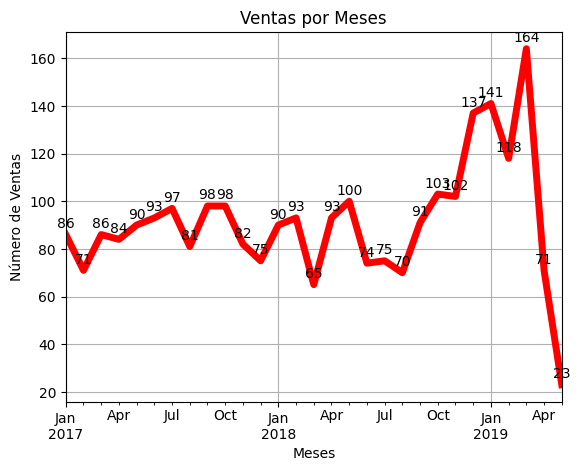

In [ ]:
#Convierte los datos de fecha en valores
df['Fecha Venta'] = pd.to_datetime(df['Fecha Venta'])

#Grafico de lineas para mostrar las vendas en cada mes
# Crear el gráfico de línea
ax = df.groupby(df['Fecha Venta'].dt.to_period('M')).size().plot(kind='line')

# Obtener los datos de X y Y del gráfico
x_values = ax.get_lines()[0].get_xdata()
y_values = ax.get_lines()[0].get_ydata()

# Agregar etiquetas de datos
for x, y in zip(x_values, y_values):
    plt.annotate(f'{int(y)}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center')
#Color y grosor de la linea
ax = df.groupby(df['Fecha Venta'].dt.to_period('M')).size().plot(kind='line', color='red',linewidth=5)


# Personalizar el gráfico
plt.title('Ventas por Meses')
plt.xlabel('Meses')
plt.ylabel('Número de Ventas')
plt.grid(True)
plt.show()

Se observa una variabilidad significativa en las ventas mensuales, posiblemente influenciada por factores económicos, estacionales o dinámicas del mercado. Es destacable la tendencia de crecimiento registrada hacia finales de 2018 y principios de 2019, seguida de una fuerte caída posterior. Esto sugiere la necesidad de un análisis más detallado para identificar las posibles causas y comprender mejor el comportamiento del mercado

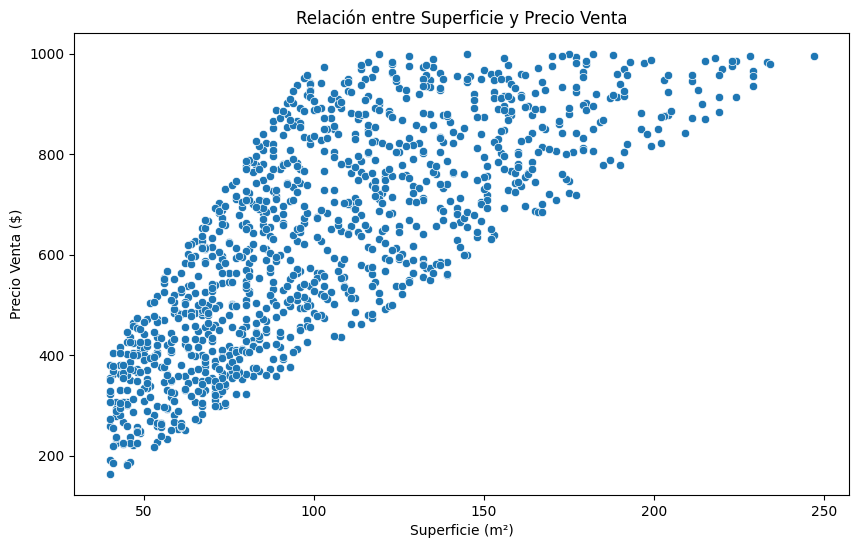

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Superficie', y='Precio Venta')
plt.title('Relación entre Superficie y Precio Venta')
plt.xlabel('Superficie (m²)')
plt.ylabel('Precio Venta ($)')
plt.show()


<Axes: title={'center': 'Estatus'}, ylabel='count'>

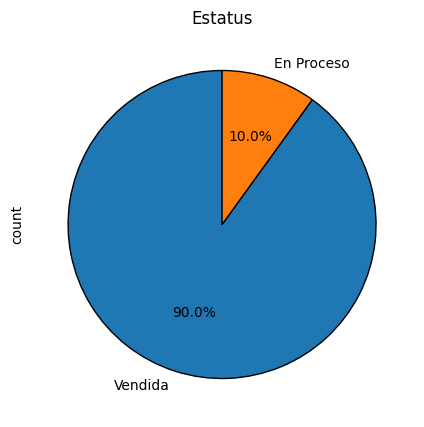

In [ ]:
df['Estatus'].value_counts().plot(kind='pie',
                                  title='Estatus',
                                  autopct='%1.1f%%',  # Muestra el porcentaje con 1 decimal
                                  startangle=90,  # Para que el gráfico comience desde arriba
                                  figsize=(5, 5),  # Tamaño del gráfico
                                  wedgeprops={'edgecolor': 'black'})  # Bordes de los sectores


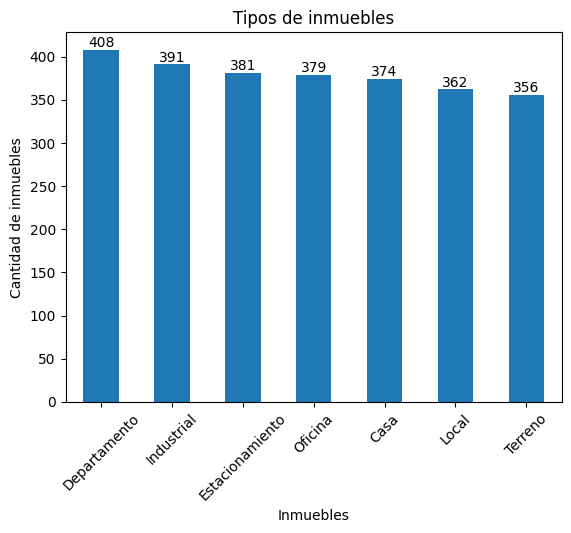

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Contar la frecuencia de cada tipo de inmueble
conteo_tipos = df['Tipo'].value_counts()

# Crear el gráfico de barras
conteo_tipos.plot(kind='bar', title='Tipos de inmuebles')

# Agregar etiquetas a las barras
for i in range(len(conteo_tipos)):
    plt.text(i, conteo_tipos.iloc[i], str(conteo_tipos.iloc[i]), ha='center', va='bottom')

# Etiquetas de los ejes
plt.xlabel('Inmuebles')
plt.ylabel('Cantidad de inmuebles')
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

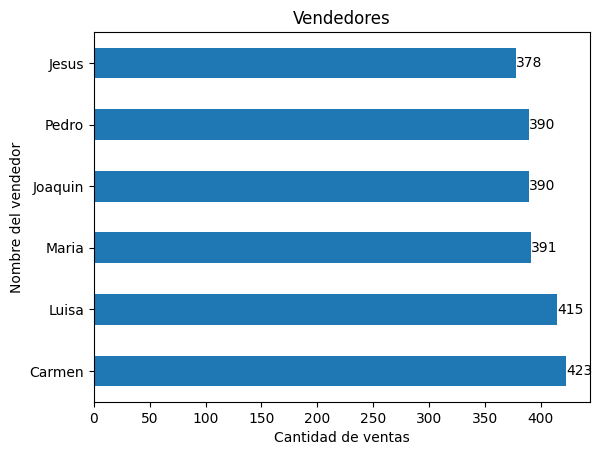

In [ ]:
#Grafico de Barras horizontales de vendedores

import matplotlib.pyplot as plt


# Contar la frecuencia de cada tipo de inmueble
conteo_tipos = df['Vendedor'].value_counts()

# Crear el gráfico de barras horizontales
conteo_tipos.plot(kind='barh', title='Vendedores')

# Agregar etiquetas a las barras (ahora en el eje horizontal)
for i, v in enumerate(conteo_tipos):
    plt.text(v, i, str(v), va='center')

# Etiquetas de los ejes
plt.xlabel('Cantidad de ventas')
plt.ylabel('Nombre del vendedor')



# Mostrar el gráfico
plt.show()

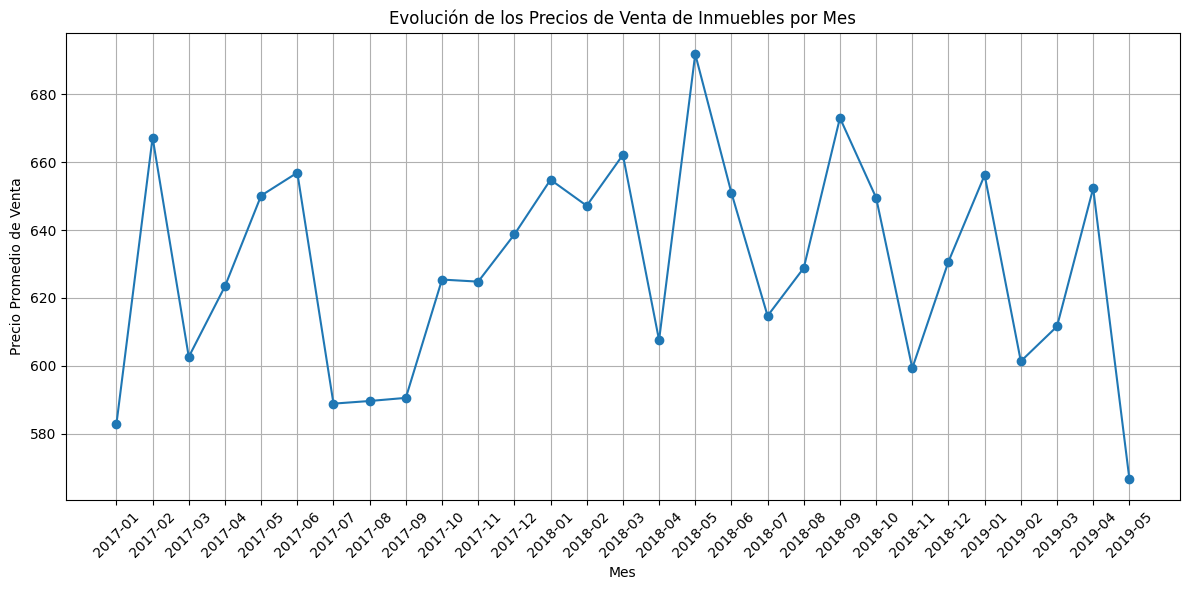

In [ ]:
df['Fecha Venta'] = pd.to_datetime(df['Fecha Venta'])
df['Mes'] = df['Fecha Venta'].dt.to_period('M')  # Agrupar por mes
precios_promedio_mensuales = df.groupby('Mes')['Precio Venta'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(precios_promedio_mensuales['Mes'].astype(str), precios_promedio_mensuales['Precio Venta'], marker='o')
plt.title('Evolución de los Precios de Venta de Inmuebles por Mes')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio de Venta')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

plt.grid()
plt.tight_layout()  # Ajustar el diseño para que no se superpongan elementos
plt.show()